In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv("/Users/stephenkullman/Downloads/COVID-19_Vaccination_Demographics_in_the_United_States_National.csv")

In [3]:
df.head()
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [4]:
df = df.sort_values(by="Date")
display(df)

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days
22745,2020-12-13,Race_eth_NHBlack,1922,7.90,6.10,484,0.00,0.00,7.80,5.90,...,7.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22725,2020-12-13,Ages_5-11_yrs,487,1.50,1.50,14,0.00,0.00,0.20,0.20,...,0.20,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
22724,2020-12-13,Sex_Male,13032,41.40,41.00,3978,0.00,0.00,49.30,48.80,...,49.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22723,2020-12-13,Ages_<2yrs,0,0.00,0.00,0,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22722,2020-12-13,Ages_18-24_yrs,1481,4.70,4.70,384,0.00,0.00,4.70,4.70,...,4.70,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2022-10-12,Race_eth_NHBlack,20511981,10.30,7.70,17965075,49.80,43.60,10.10,7.90,...,10.10,10.00,"8,362,983.00","42,721.00",33.00,7.60,6.80,8.10,"1,739,565.00","77,005.00"
20,2022-10-12,Ages_25-49_yrs,91706611,34.60,34.60,77550587,84.00,71.00,34.30,34.30,...,35.70,24.00,"32,183,692.00","118,481.00",NaN,NaN,NaN,NaN,NaN,NaN
19,2022-10-12,Sex_unknown,2307267,0.90,0.90,1512228,NaN,NaN,0.70,0.70,...,0.70,0.10,"204,599.00",648.00,20.50,0.10,0.10,0.10,"22,432.00",915.00
26,2022-10-12,Ages_50-64_yrs,60198563,22.70,22.70,52672176,94.60,82.70,23.30,23.30,...,24.20,22.70,"29,459,028.00","111,907.00",29.80,34.30,34.30,41.60,"8,786,419.00","446,286.00"


# Exploring the Data

In [5]:
#What time frame is the data?
min(df["Date"]), max(df["Date"])

(Timestamp('2020-12-13 00:00:00'), Timestamp('2022-10-12 00:00:00'))

In [6]:
#What are the Demographics represented?
display(df["Demographic_category"].unique())

array(['Race_eth_NHBlack', 'Ages_5-11_yrs', 'Sex_Male', 'Ages_<2yrs',
       'Ages_18-24_yrs', 'Race_eth_NHMult_Oth', 'Ages_65-74_yrs',
       'Race_eth_unknown', 'Ages_65+_yrs', 'Race_eth_NHAsian',
       'Race_eth_NHAIAN', 'Ages_<5yrs', 'Ages_50-64_yrs', 'Sex_unknown',
       'Ages_2-4_yrs', 'Race_eth_NHOther', 'Race_eth_NHNHOPI',
       'Age_unknown', 'Sex_Female', 'Ages_16-17_yrs', 'Race_eth_Hispanic',
       'Ages_25-49_yrs', 'Race_eth_NHWhite', 'Ages_<12yrs',
       'Ages_12-17_yrs', 'Race_eth_known', 'Ages_25-39_yrs',
       'Ages_40-49_yrs', 'Ages_12-15_yrs', 'Sex_known',
       'Race_eth_NHMultiracial', 'Age_known', 'Ages_75+_yrs', 'US'],
      dtype=object)

In [7]:
#Separate Ages Demographics and Races Demographics and Sex Demographics
def maskFilter(string):
    agemask = df["Demographic_category"].str.contains(string)
    final_df = df[agemask]
    final_df_mod = final_df[["Date","Demographic_category","Administered_Dose1","Series_Complete_Yes","Booster_Doses_Yes"]]
    final_df_mod = final_df_mod.reset_index(drop = True)
    return final_df_mod

# Age

In [8]:
age_df = maskFilter("Ages")

In [9]:
age_df

,Date,Demographic_category,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes
0,2020-12-13,Ages_5-11_yrs,487,14,0.00
1,2020-12-13,Ages_<2yrs,0,0,NaN
2,2020-12-13,Ages_18-24_yrs,1481,384,0.00
3,2020-12-13,Ages_65-74_yrs,5812,1710,0.00
4,2020-12-13,Ages_65+_yrs,9494,2316,0.00
...,...,...,...,...,...
10699,2022-10-12,Ages_<2yrs,397362,132673,NaN
10700,2022-10-12,Ages_16-17_yrs,6283481,5389345,"1,766,501.00"
10701,2022-10-12,Ages_25-49_yrs,91706611,77550587,"32,183,692.00"
10702,2022-10-12,Ages_50-64_yrs,60198563,52672176,"29,459,028.00"


# Race

In [10]:
race_df = maskFilter("Race")

In [11]:
race_df = race_df[race_df.Demographic_category != "Race_eth_known"]
race_df

,Date,Demographic_category,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes
0,2020-12-13,Race_eth_NHBlack,1922,484,0.00
1,2020-12-13,Race_eth_NHMult_Oth,1040,326,0.00
2,2020-12-13,Race_eth_unknown,7375,1945,0.00
3,2020-12-13,Race_eth_NHAsian,918,267,0.00
4,2020-12-13,Race_eth_NHAIAN,327,53,0.00
...,...,...,...,...,...
7353,2022-10-12,Race_eth_NHOther,7886665,6617897,"3,139,219.00"
7354,2022-10-12,Race_eth_NHMultiracial,4177372,4171374,"2,867,330.00"
7356,2022-10-12,Race_eth_Hispanic,41585331,35364311,"15,078,054.00"
7357,2022-10-12,Race_eth_NHNHOPI,647624,582301,"286,974.00"


# Sex

In [12]:
sex_df = maskFilter("Sex")

In [13]:
sex_df = sex_df[sex_df.Demographic_category != "Sex_known"]
sex_df

,Date,Demographic_category,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes
0,2020-12-13,Sex_Male,13032,3978,0.00
1,2020-12-13,Sex_unknown,264,88,0.00
2,2020-12-13,Sex_Female,18457,4086,0.00
4,2020-12-14,Sex_Male,14893,4039,0.00
5,2020-12-14,Sex_Female,21047,4166,0.00
...,...,...,...,...,...
2670,2022-10-11,Sex_Male,125727595,107034716,"50,159,259.00"
2671,2022-10-11,Sex_unknown,2307267,1512228,"204,599.00"
2673,2022-10-12,Sex_Male,125727595,107034716,"50,159,259.00"
2674,2022-10-12,Sex_Female,137076627,117653811,"60,345,508.00"


In [14]:
def bar_graph(X,Y):
    fig,ax = plt.subplots()
    plt.xticks(rotation=90)
    return display(ax.bar(X,Y))

<BarContainer object of 10704 artists>

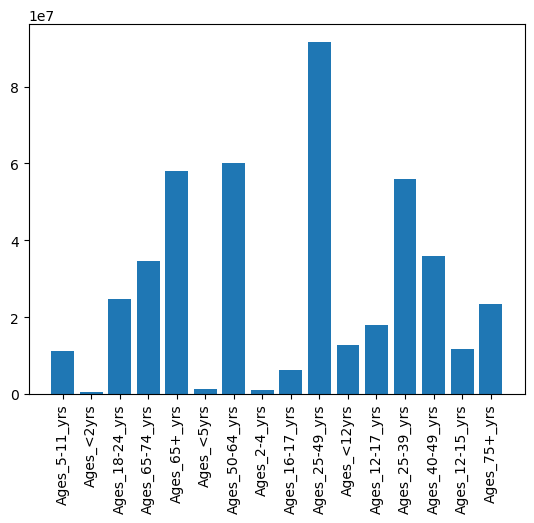

In [15]:
#Let's explore graphs of the demographics
bar_graph(age_df["Demographic_category"],age_df["Administered_Dose1"])

<BarContainer object of 10704 artists>

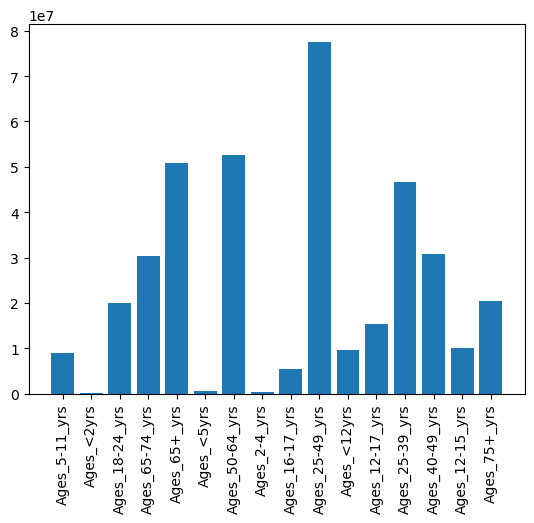

In [16]:
bar_graph(age_df["Demographic_category"],age_df["Series_Complete_Yes"])

<BarContainer object of 6690 artists>

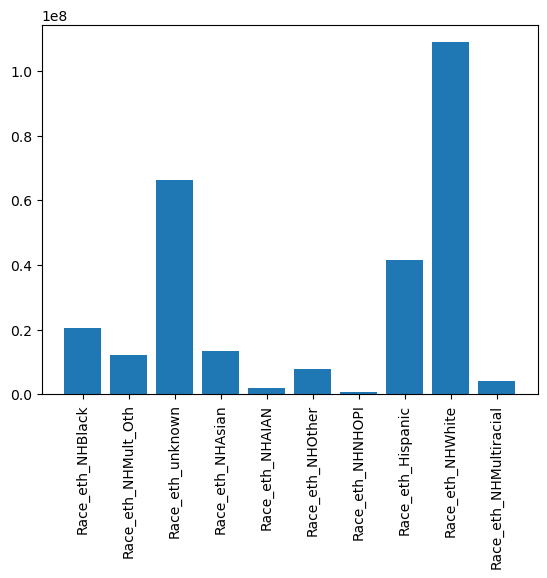

In [17]:
bar_graph(race_df["Demographic_category"],race_df["Administered_Dose1"])

<BarContainer object of 6690 artists>

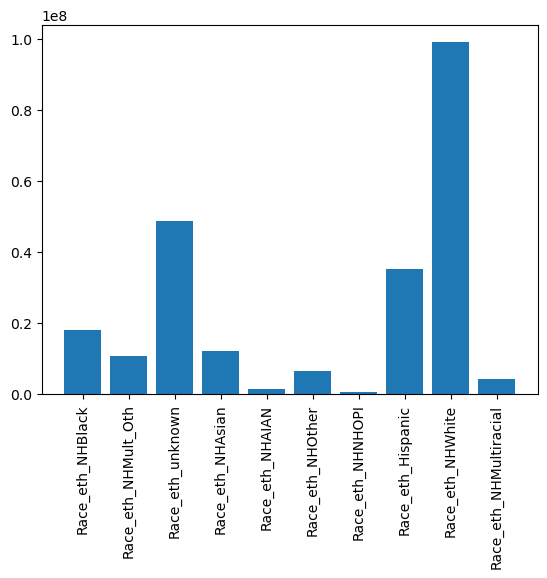

In [18]:
bar_graph(race_df["Demographic_category"],race_df["Series_Complete_Yes"])

<BarContainer object of 2007 artists>

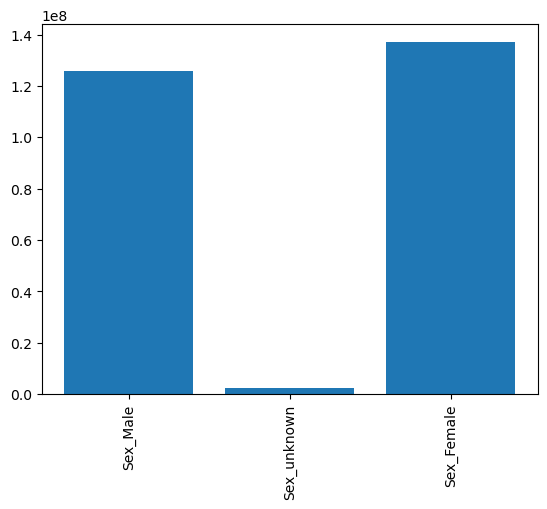

In [19]:
bar_graph(sex_df["Demographic_category"],sex_df["Administered_Dose1"])

# How did the vaccines compare over time? How many of each demographic got 1, both, and boosted?

## Age Dataframe

In [20]:
age_df_vax_series = age_df.pivot_table(index =['Demographic_category'], 
                       values =['Administered_Dose1','Series_Complete_Yes','Booster_Doses_Yes'], aggfunc ='max')

In [21]:
#display(age_df_vax_series)

In [22]:
age_df_vax_series = age_df_vax_series[["Administered_Dose1","Series_Complete_Yes","Booster_Doses_Yes"]]

In [23]:
age_df_vax_series["Percent Retained"] = (age_df_vax_series["Booster_Doses_Yes"] / age_df_vax_series["Administered_Dose1"]) * 100

In [24]:
#display(age_df_vax_series)

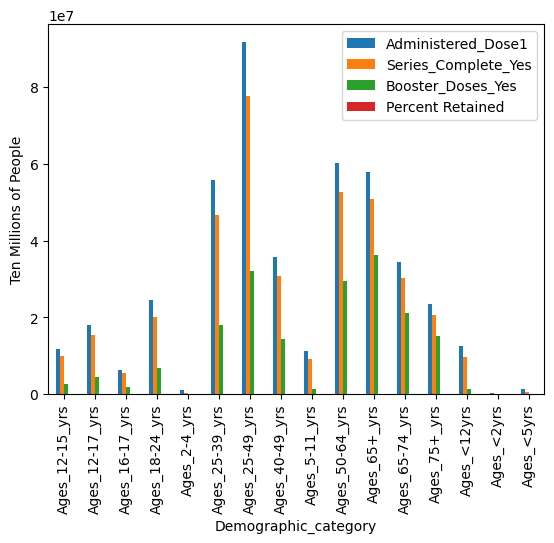

In [70]:
ax = age_df_vax_series.plot(kind = 'bar', ylabel = "Ten Millions of People")


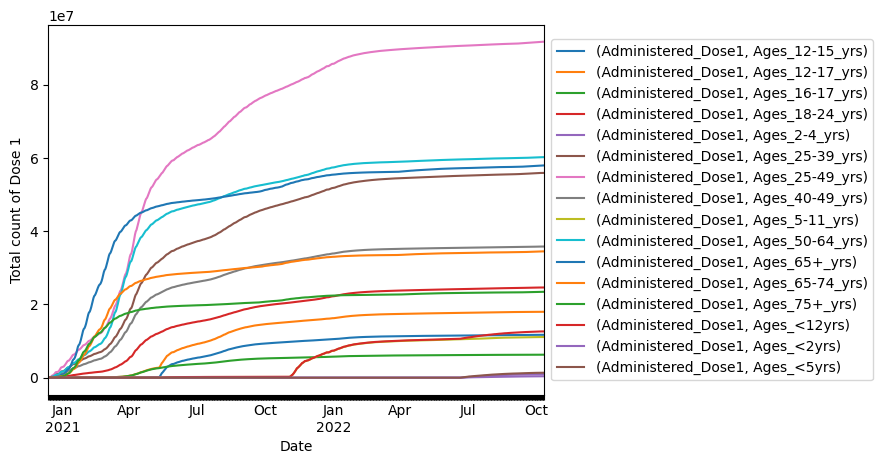

In [77]:
Administered_Dose1_Age = age_df[["Date","Demographic_category","Administered_Dose1"]]
Administered_Dose1_Age_pivot = Administered_Dose1_Age.pivot(index = "Date", columns = "Demographic_category")
ax = Administered_Dose1_Age_pivot.plot(xticks=Administered_Dose1_Age_pivot.index, ylabel='Total count of Dose 1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


## Race 

In [27]:
race_df_vax_series = race_df.pivot_table(index =['Demographic_category'], 
                       values =['Administered_Dose1','Series_Complete_Yes','Booster_Doses_Yes'], aggfunc ='max')

In [28]:
display(race_df_vax_series)

,Administered_Dose1,Booster_Doses_Yes,Series_Complete_Yes
Demographic_category,,,
Race_eth_Hispanic,41585331,"15,078,054.00",35364311
Race_eth_NHAIAN,1838479,"718,266.00",1528285
Race_eth_NHAsian,13434294,"8,169,041.00",12064433
Race_eth_NHBlack,20511981,"8,362,983.00",17965075
Race_eth_NHMult_Oth,12064037,"6,006,549.00",10789271
Race_eth_NHMultiracial,4177372,"2,867,330.00",4171374
Race_eth_NHNHOPI,647624,"286,974.00",582301
Race_eth_NHOther,7886665,"3,139,219.00",6617897
Race_eth_NHWhite,108905897,"59,520,025.00",99160825


In [29]:
race_df_vax_series = race_df_vax_series[["Administered_Dose1","Series_Complete_Yes","Booster_Doses_Yes"]]

In [30]:
race_df_vax_series["Percent Retained"] = race_df_vax_series["Booster_Doses_Yes"] / race_df_vax_series["Administered_Dose1"] * 100

In [31]:
race_df_vax_series

,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes,Percent Retained
Demographic_category,,,,
Race_eth_Hispanic,41585331,35364311,"15,078,054.00",36.26
Race_eth_NHAIAN,1838479,1528285,"718,266.00",39.07
Race_eth_NHAsian,13434294,12064433,"8,169,041.00",60.81
Race_eth_NHBlack,20511981,17965075,"8,362,983.00",40.77
Race_eth_NHMult_Oth,12064037,10789271,"6,006,549.00",49.79
Race_eth_NHMultiracial,4177372,4171374,"2,867,330.00",68.64
Race_eth_NHNHOPI,647624,582301,"286,974.00",44.31
Race_eth_NHOther,7886665,6617897,"3,139,219.00",39.80
Race_eth_NHWhite,108905897,99160825,"59,520,025.00",54.65


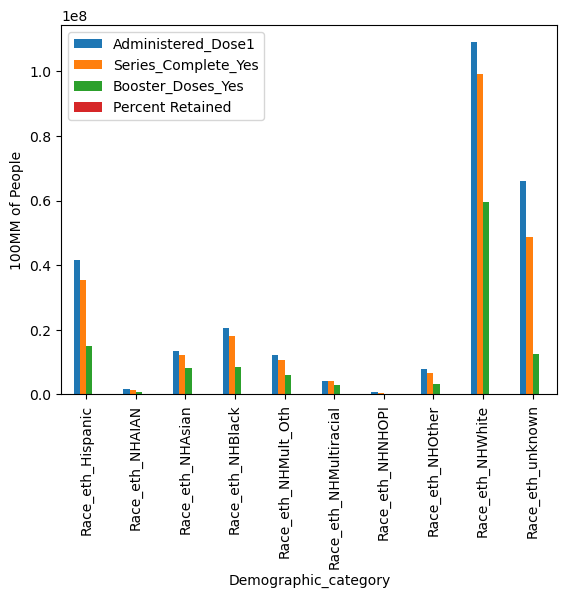

In [74]:
ax = race_df_vax_series.plot(kind = 'bar', ylabel = "100MM of People")

In [33]:
Administered_Dose1_Race = race_df[["Date","Demographic_category","Administered_Dose1"]]

In [34]:
Administered_Dose1_Race_pivot = Administered_Dose1_Race.pivot(index = "Date", columns = "Demographic_category")
display(Administered_Dose1_Race_pivot)

Administered_Dose1                                   \
Demographic_category  Race_eth_Hispanic Race_eth_NHAIAN Race_eth_NHAsian   
Date                                                                       
2020-12-13                         2066             327              918   
2020-12-14                         2341             387             1083   
2020-12-15                        10119            1119             3148   
2020-12-16                        28187            4307            11196   
2020-12-17                        55120            9309            26787   
...                                 ...             ...              ...   
2022-10-08                     41580493         1838293         13431479   
2022-10-09                     41582120         1838360         13432505   
2022-10-10                     41584793         1838458         13434018   
2022-10-11                     41585331         1838479         13434294   
2022-10-12                     41585331         1838479         13434294   

                                                           \
Demographic_category Race_eth_NHBlack Race_eth_NHMult_Oth   
Date                                                        
2020-12-13                       1922                1040   
2020-12-14                       2099                1295   
2020-12-15                       3637                3726   
2020-12-16                       8309               11296   
2020-12-17                      15491               22301   
...                               ...                 ...   
2022-10-08                   20508514            12062911   
2022-10-09                   20509385            12063251   
2022-10-10                   20511484            12063949   
2022-10-11                   20511981            12064037   
2022-10-12                   20511981            12064037   

                                                                               \
Demographic_category Race_eth_NHMultiracial Race_eth_NHNHOPI Race_eth_NHOther   
Date                                                                            
2020-12-13                              333               59              707   
2020-12-14                              419               70              876   
2020-12-15                             1446              117             2280   
2020-12-16                             4552              384             6744   
2020-12-17                             8796             1072            13505   
...                                     ...              ...              ...   
2022-10-08                          4177134           647556          7885777   
2022-10-09                          4177205           647581          7886046   
2022-10-10                          4177360           647615          7886589   
2022-10-11                          4177372           647624          7886665   
2022-10-12                          4177372           647624          7886665   

                                                        
Demographic_category Race_eth_NHWhite Race_eth_unknown  
Date                                                    
2020-12-13                      18046             7375  
2020-12-14                      20346             8705  
2020-12-15                      38845            21821  
2020-12-16                      97420            76547  
2020-12-17                     199610           175669  
...                               ...              ...  
2022-10-08                  108887437         66113357  
2022-10-09                  108894034         66117764  
2022-10-10                  108904032         66122993  
2022-10-11                  108905897         66123828  
2022-10-12                  108905897         66123828  

[669 rows x 10 columns]

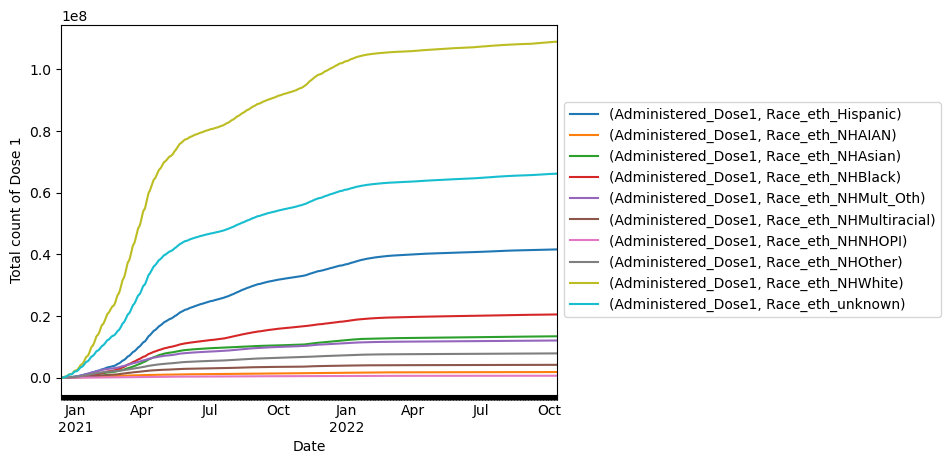

In [76]:
ax = Administered_Dose1_Race_pivot.plot(xticks=Administered_Dose1_Race_pivot.index, ylabel='Total count of Dose 1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Sex

In [36]:
sex_df_vax_series = sex_df.pivot_table(index =['Demographic_category'], 
                       values =['Administered_Dose1','Series_Complete_Yes','Booster_Doses_Yes'], aggfunc ='max')

In [37]:
sex_df_vax_series = sex_df_vax_series[["Administered_Dose1","Series_Complete_Yes","Booster_Doses_Yes"]]

In [38]:
display(sex_df_vax_series)

,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes
Demographic_category,,,
Sex_Female,137076627,117653811,"60,345,508.00"
Sex_Male,125727595,107034716,"50,159,259.00"
Sex_unknown,2307267,1512228,"204,599.00"


In [39]:
sex_df_vax_series["Percent Retained"] = sex_df_vax_series["Booster_Doses_Yes"] / sex_df_vax_series["Administered_Dose1"] * 100

In [40]:
sex_df_vax_series

,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes,Percent Retained
Demographic_category,,,,
Sex_Female,137076627,117653811,"60,345,508.00",44.02
Sex_Male,125727595,107034716,"50,159,259.00",39.90
Sex_unknown,2307267,1512228,"204,599.00",8.87


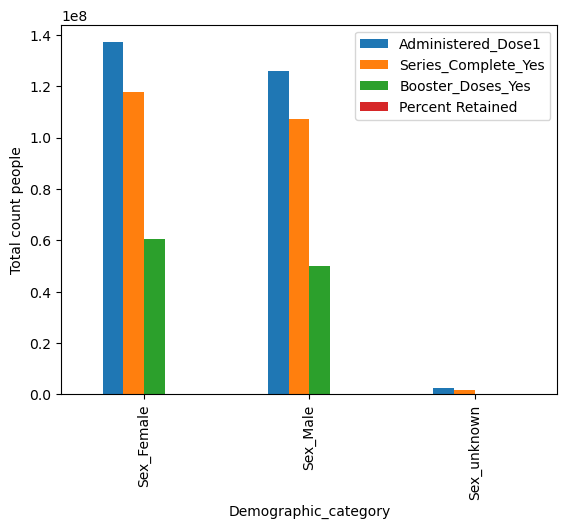

In [75]:
ax = sex_df_vax_series.plot(kind = 'bar', ylabel = "Total count people")

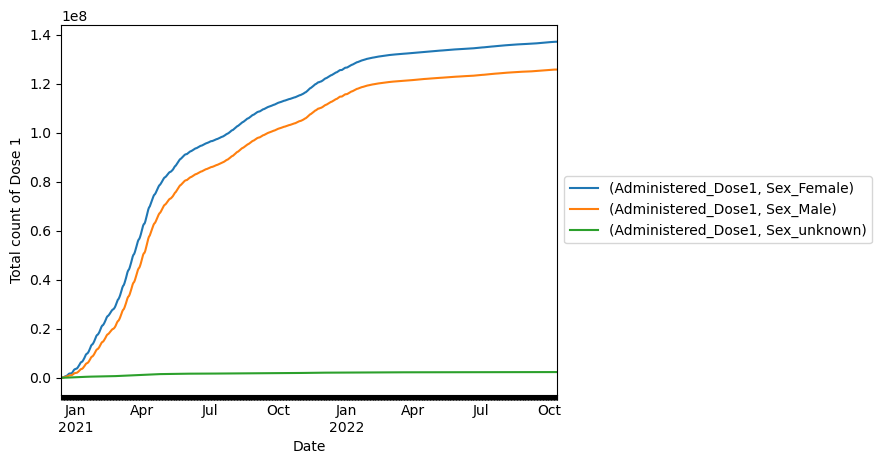

In [42]:
Administered_Dose1_Sex = sex_df[["Date","Demographic_category","Administered_Dose1"]]
Administered_Dose1_Sex_pivot = Administered_Dose1_Sex.pivot(index = "Date", columns = "Demographic_category")
ax = Administered_Dose1_Sex_pivot.plot(xticks=Administered_Dose1_Sex_pivot.index, ylabel='Total count of Dose 1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Inital Takeaways
* Young age groups didn't complete full vaccination series
* Booster Data is unreliable - based on timing of final vaccine.
* No discernable difference between men and women

# Three Dataframes

In [43]:
sex_df_vax_series

,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes,Percent Retained
Demographic_category,,,,
Sex_Female,137076627,117653811,"60,345,508.00",44.02
Sex_Male,125727595,107034716,"50,159,259.00",39.90
Sex_unknown,2307267,1512228,"204,599.00",8.87


In [44]:
race_df_vax_series

,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes,Percent Retained
Demographic_category,,,,
Race_eth_Hispanic,41585331,35364311,"15,078,054.00",36.26
Race_eth_NHAIAN,1838479,1528285,"718,266.00",39.07
Race_eth_NHAsian,13434294,12064433,"8,169,041.00",60.81
Race_eth_NHBlack,20511981,17965075,"8,362,983.00",40.77
Race_eth_NHMult_Oth,12064037,10789271,"6,006,549.00",49.79
Race_eth_NHMultiracial,4177372,4171374,"2,867,330.00",68.64
Race_eth_NHNHOPI,647624,582301,"286,974.00",44.31
Race_eth_NHOther,7886665,6617897,"3,139,219.00",39.80
Race_eth_NHWhite,108905897,99160825,"59,520,025.00",54.65


In [45]:
age_df_vax_series

,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes,Percent Retained
Demographic_category,,,,
Ages_12-15_yrs,11711846,10004984,"2,743,804.00",23.43
Ages_12-17_yrs,17995327,15394329,"4,510,305.00",25.06
Ages_16-17_yrs,6283481,5389345,"1,766,501.00",28.11
Ages_18-24_yrs,24630090,20032814,"6,847,783.00",27.80
Ages_2-4_yrs,965544,383944,NaN,NaN
Ages_25-39_yrs,55899380,46721689,"17,931,281.00",32.08
Ages_25-49_yrs,91706611,77550587,"32,183,692.00",35.09
Ages_40-49_yrs,35807231,30828898,"14,252,411.00",39.80
Ages_5-11_yrs,11103465,9074774,"1,413,478.00",12.73


In [46]:
total_vax_series = pd.concat([race_df_vax_series,age_df_vax_series,sex_df_vax_series],axis = 0)

In [47]:
total_vax_series

,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes,Percent Retained
Demographic_category,,,,
Race_eth_Hispanic,41585331,35364311,"15,078,054.00",36.26
Race_eth_NHAIAN,1838479,1528285,"718,266.00",39.07
Race_eth_NHAsian,13434294,12064433,"8,169,041.00",60.81
Race_eth_NHBlack,20511981,17965075,"8,362,983.00",40.77
Race_eth_NHMult_Oth,12064037,10789271,"6,006,549.00",49.79
Race_eth_NHMultiracial,4177372,4171374,"2,867,330.00",68.64
Race_eth_NHNHOPI,647624,582301,"286,974.00",44.31
Race_eth_NHOther,7886665,6617897,"3,139,219.00",39.80
Race_eth_NHWhite,108905897,99160825,"59,520,025.00",54.65


In [48]:
total_vax_series = total_vax_series.dropna()

# Linear Regression for Race_eth_NHAIAN

In [57]:
linReg = race_df[race_df.Demographic_category == "Race_eth_NHAIAN"]

In [58]:
linReg = linReg[["Date","Demographic_category","Administered_Dose1"]]

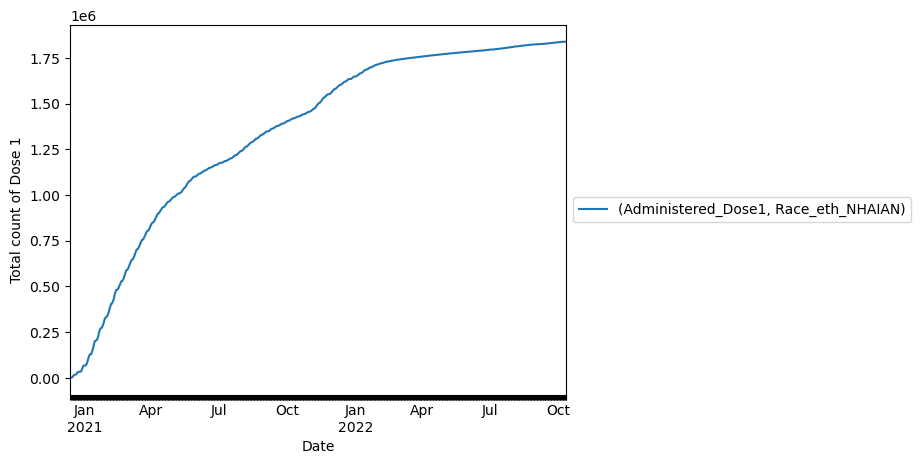

In [59]:
LinReg_Pivot = linReg.pivot(index = "Date", columns = "Demographic_category")
ax = LinReg_Pivot.plot(xticks=LinReg_Pivot.index, ylabel='Total count of Dose 1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [60]:
import matplotlib.dates as mdates

In [61]:
x = mdates.date2num(linReg["Date"])

In [62]:
y = (linReg["Administered_Dose1"].values)

In [78]:
# https://stackoverflow.com/questions/17638137/curve-fitting-to-a-time-series-in-the-format-datetime
m,b = np.polyfit(x, y,1) 

Text(0.5, 1.0, 'Native American and Alaska Native Trend Line')

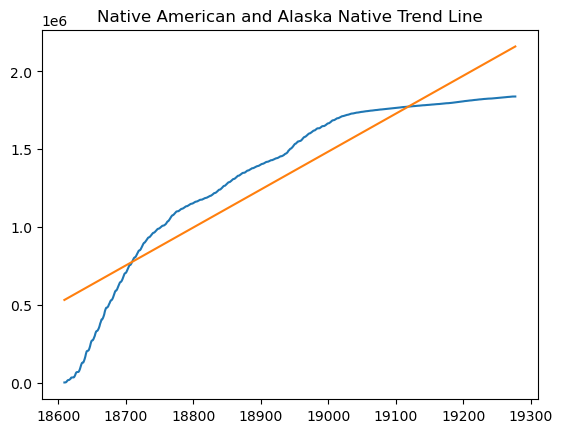

In [81]:
fig, cx = plt.subplots()
cx.plot(x,y)
cx.plot(x, m*x+b)
plt.title("Native American and Alaska Native Trend Line")
plt.ylabel("")